<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [1]:
# insert code here
import tensorflow as tf
from tensorflow import keras

print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.6.0


In [2]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [3]:
# insert code here
diabetes = load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [14]:
# insert code here
# input
X = diabetes.data
n_cols = X.shape[1]

# output
y = diabetes.target

# X type
print(type(X))

# shape of X
print(X.shape)

# values of y
print(y[:10])

<class 'numpy.ndarray'>
(442, 10)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [15]:
# how many observations in y
len(y)

442

### Split the data (training/test)

In [16]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [17]:
# insert code here
# Set up the model architecture
model = Sequential()

In [18]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [20]:
# insert code here
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [21]:
# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [22]:
%%time
# insert code here
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 1000,
    verbose = 0)

CPU times: total: 2min 11s
Wall time: 41.4 s


### Create predictions

In [23]:
# insert code here
predictions = model.predict(X_test)

### Evaluate the model

In [24]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

5/5 [==============================] - 0s 0s/step - loss: 3301.9526 - mse: 3301.9526

Test loss: 3301.952637, Test accuracy: 3301.952637


In [25]:
score

[3301.95263671875, 3301.95263671875]

In [26]:
# Find RMSE
score[0] ** (1/2)

57.4626194731736

In [27]:
y.mean()

152.13348416289594

In [28]:
y.std()

77.00574586945044

In [29]:
y.min()

25.0

In [30]:
y.max()

346.0

In [31]:
# insert code here
history.history

{'loss': [28751.2421875,
  28739.822265625,
  28728.142578125,
  28711.90625,
  28688.935546875,
  28655.345703125,
  28604.36328125,
  28531.9453125,
  28431.908203125,
  28299.779296875,
  28130.623046875,
  27923.478515625,
  27671.87109375,
  27367.576171875,
  27004.06640625,
  26600.3671875,
  26124.28515625,
  25587.90234375,
  25001.306640625,
  24359.80859375,
  23668.2421875,
  22926.619140625,
  22144.70703125,
  21348.185546875,
  20469.853515625,
  19584.171875,
  18674.771484375,
  17741.205078125,
  16802.07421875,
  15874.5078125,
  14950.1171875,
  14023.5244140625,
  13081.66796875,
  12216.2685546875,
  11383.1025390625,
  10552.412109375,
  9781.6884765625,
  9047.24609375,
  8415.068359375,
  7892.62841796875,
  7397.6201171875,
  6948.138671875,
  6550.9580078125,
  6160.76806640625,
  5863.74658203125,
  5604.0361328125,
  5379.5615234375,
  5189.123046875,
  5034.35400390625,
  4900.78369140625,
  4793.60595703125,
  4681.64501953125,
  4612.9609375,
  4542.6635

### Visualisation of residuals

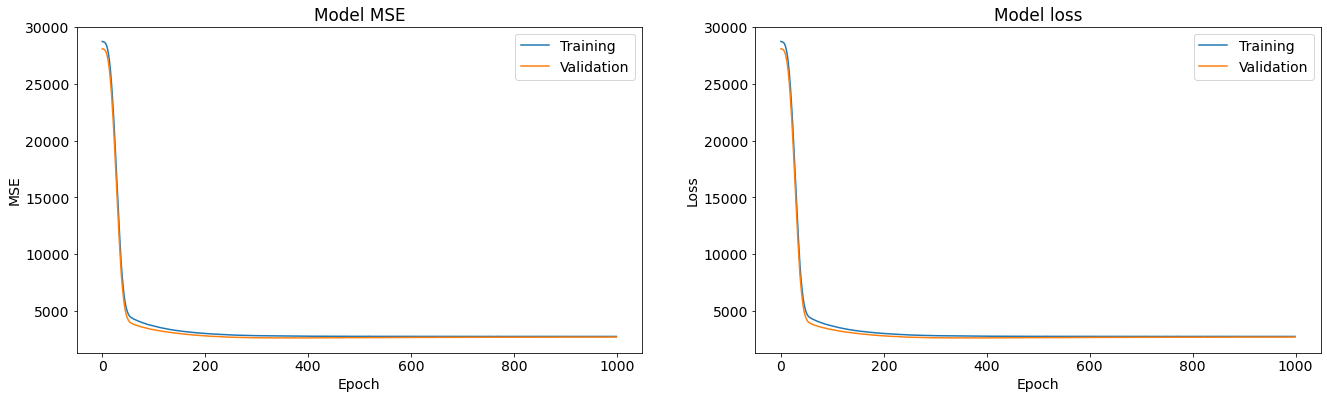

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of cost

In [37]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

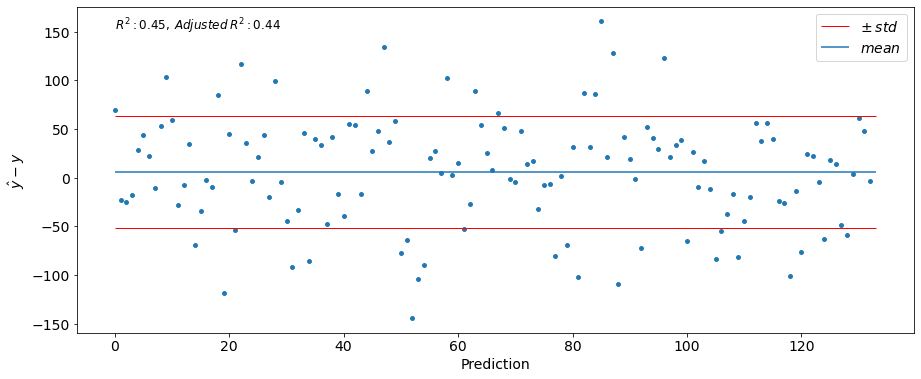

In [38]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



